In [1]:
#importing packages
import pandas as pd
import numpy as np

In [2]:
Dtrain = pd.read_csv("../TrainingSet (OR - 7).csv")
Dtest = pd.read_csv("../TestingSet (OR - 7).csv")

In [3]:
print(Dtrain.shape)
print(Dtest.shape)

(193792, 4)
(48448, 4)


In [4]:
Dtrain["Bearing"].value_counts()

Outer Race (0.007")    96896
Normal                 96896
Name: Bearing, dtype: int64

In [5]:
Dtrain["Bearing"].value_counts(normalize=True)*100

Outer Race (0.007")    50.0
Normal                 50.0
Name: Bearing, dtype: float64

In [6]:
Dtest.columns

Index(['Bearing', 'Fault Diameter', 'DE', 'FE'], dtype='object')

In [7]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
labelencoder_train = LabelEncoder()
Dtrain["Bearing"] = labelencoder_train.fit_transform(Dtrain["Bearing"])
ct = ColumnTransformer([("Bearing", OneHotEncoder(), [0])],    remainder = 'passthrough')
Dtrain = ct.fit_transform(Dtrain)

In [8]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
labelencoder_train = LabelEncoder()
Dtest["Bearing"] = labelencoder_train.fit_transform(Dtest["Bearing"])
ct = ColumnTransformer([("Bearing", OneHotEncoder(), [0])],    remainder = 'passthrough')
Dtest = ct.fit_transform(Dtest)

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = pd.DataFrame(scaler.fit_transform(Dtrain))
# Random shuffle training data
X_train.sample(frac=1)

X_test = pd.DataFrame(scaler.transform(Dtest))

In [10]:
X_train = X_train.values.reshape(-1, 1, 5)

X_test  = X_test.values.reshape(-1, 1, 5)

In [11]:
from keras.layers import Input, Dropout, Dense, LSTM, RepeatVector, TimeDistributed
from keras.models import Model, Sequential, load_model
from keras import regularizers

Using TensorFlow backend.


In [12]:
# Input layer:
model=Sequential([
    LSTM(32, activation='relu', input_shape=(X_train.shape[1],X_train.shape[2])),
    Dropout(0.2),
    RepeatVector(X_train.shape[1]),
    LSTM(32, activation='relu', return_sequences=True),
    Dropout(0.2),
    TimeDistributed(Dense(X_train.shape[2]))
])

model.compile(loss='mse',optimizer='adam' )
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 32)                4864      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
repeat_vector_1 (RepeatVecto (None, 1, 32)             0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 1, 32)             8320      
_________________________________________________________________
dropout_2 (Dropout)          (None, 1, 32)             0         
_________________________________________________________________
time_distributed_1 (TimeDist (None, 1, 5)              165       
Total params: 13,349
Trainable params: 13,349
Non-trainable params: 0
__________________________________________________

In [13]:
# Train model for 100 epochs, batch size of 100: 
NUM_EPOCHS=100
BATCH_SIZE=1000

history=model.fit(X_train,X_train, 
                  batch_size=BATCH_SIZE, 
                  epochs=NUM_EPOCHS,
                  validation_data=(X_test, X_test),
                  shuffle=False)

Train on 193792 samples, validate on 48448 samples
Epoch 1/100
193792/193792 [==============================] - 16s 83us/step - loss: 0.1910 - val_loss: 0.1090
Epoch 2/100
193792/193792 [==============================] - 5s 26us/step - loss: 0.0530 - val_loss: 0.0152
Epoch 3/100
193792/193792 [==============================] - 5s 24us/step - loss: 0.0212 - val_loss: 0.0059
Epoch 4/100
193792/193792 [==============================] - 5s 27us/step - loss: 0.0169 - val_loss: 0.0042
Epoch 5/100
193792/193792 [==============================] - 5s 25us/step - loss: 0.0146 - val_loss: 0.0036
Epoch 6/100
193792/193792 [==============================] - 5s 24us/step - loss: 0.0128 - val_loss: 0.0032
Epoch 7/100
193792/193792 [==============================] - 5s 23us/step - loss: 0.0111 - val_loss: 0.0071
Epoch 8/100
193792/193792 [==============================] - 5s 25us/step - loss: 0.0103 - val_loss: 0.0027
Epoch 9/100
193792/193792 [==============================] - 5s 24us/step - loss: 0.

193792/193792 [==============================] - 5s 23us/step - loss: 0.0041 - val_loss: 0.0015
Epoch 76/100
193792/193792 [==============================] - 5s 24us/step - loss: 0.0040 - val_loss: 0.0016
Epoch 77/100
193792/193792 [==============================] - 4s 22us/step - loss: 0.0040 - val_loss: 0.0016
Epoch 78/100
193792/193792 [==============================] - 4s 22us/step - loss: 0.0040 - val_loss: 0.0017
Epoch 79/100
193792/193792 [==============================] - 4s 22us/step - loss: 0.0040 - val_loss: 0.0017
Epoch 80/100
193792/193792 [==============================] - 4s 22us/step - loss: 0.0040 - val_loss: 0.0016
Epoch 81/100
193792/193792 [==============================] - 4s 22us/step - loss: 0.0040 - val_loss: 0.0015
Epoch 82/100
193792/193792 [==============================] - 4s 20us/step - loss: 0.0040 - val_loss: 0.0016
Epoch 83/100
193792/193792 [==============================] - 3s 15us/step - loss: 0.0040 - val_loss: 0.0016
Epoch 84/100
193792/193792 [====

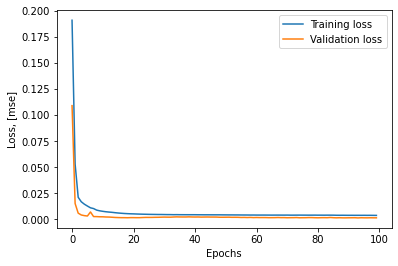

In [14]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend(loc='upper right')
plt.xlabel('Epochs')
plt.ylabel('Loss, [mse]')
plt.show()

In [15]:
X_pred = model.predict(X_train)

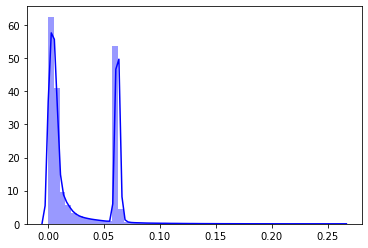

In [16]:
import seaborn as sns

scored = np.mean(np.abs(X_pred-X_train), axis = 1)
plt.figure()
g = sns.distplot(scored, bins = 50, kde= True, color = 'blue');
#g.set(xlim=(0.10,0.1), ylim=(0, 1))
plt.show()

In [17]:
model.evaluate(X_test,X_test)

48448/48448 [==============================] - 2s 34us/step


0.0014566171294183824

In [18]:
X_test_pred = model.predict(X_test)

In [19]:
X_test_pred = X_test_pred.reshape(X_test_pred.shape[0],X_test_pred.shape[2])
X_test = X_test.reshape(X_test.shape[0],X_test.shape[2])

In [20]:
TH = 0.07
scored = pd.DataFrame()
scored['Loss_mae'] = np.mean(np.abs(X_test_pred-X_test), axis = 1)
scored['Threshold'] = TH
scored['Anomaly'] = scored['Loss_mae'] > scored['Threshold']
scored.sample(100)

,Loss_mae,Threshold,Anomaly
33314,0.008692,0.07,False
6076,0.043663,0.07,False
41470,0.007014,0.07,False
27165,0.006338,0.07,False
4280,0.040967,0.07,False
...,...,...,...
9419,0.038918,0.07,False
14494,0.046333,0.07,False
896,0.046194,0.07,False
7026,0.038459,0.07,False


In [21]:
X_pred_train = model.predict(np.array(X_train))

In [22]:
X_pred_train = X_pred_train.reshape(X_pred_train.shape[0],X_pred_train.shape[2])
X_train = X_train.reshape(X_train.shape[0],X_train.shape[2])

In [23]:
X_pred_train = pd.DataFrame(X_pred_train)
scored_train = pd.DataFrame()
scored_train['Loss_mae'] = np.mean(np.abs(X_pred_train-X_train), axis = 1)
scored_train['Threshold'] = TH
scored_train['Anomaly'] = scored_train['Loss_mae'] > scored_train['Threshold']
scored = pd.concat([scored_train, scored])

In [24]:
scored_train['Loss_mae'].mean()

0.02597639766858728

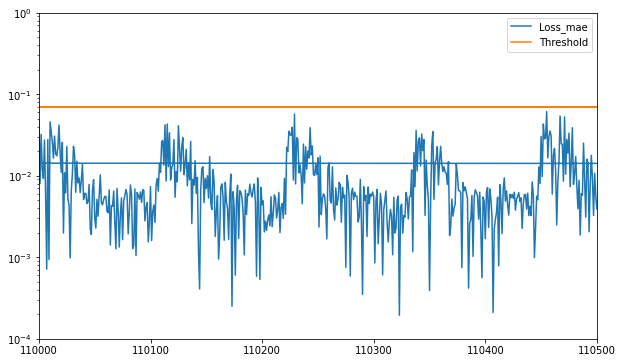

In [25]:
scored.plot(logy=True,  figsize = (10,6), xlim = [110000,110500], ylim = [1e-4,1e-0])

In [26]:
scored_train

,Loss_mae,Threshold,Anomaly
0,0.038560,0.07,False
1,0.042260,0.07,False
2,0.043112,0.07,False
3,0.045055,0.07,False
4,0.040150,0.07,False
...,...,...,...
193787,0.005465,0.07,False
193788,0.003317,0.07,False
193789,0.003541,0.07,False
193790,0.004988,0.07,False


In [27]:
anomalies = scored_train[scored_train['Anomaly'] == True]
print(anomalies)
print(anomalies.shape)

        Loss_mae  Threshold  Anomaly
97076   0.079900       0.07     True
100162  0.076200       0.07     True
101193  0.080401       0.07     True
104396  0.086702       0.07     True
107369  0.076030       0.07     True
...          ...        ...      ...
190860  0.084546       0.07     True
191205  0.078577       0.07     True
191318  0.077105       0.07     True
192463  0.072521       0.07     True
192919  0.076979       0.07     True

[72 rows x 3 columns]
(72, 3)


In [28]:
NB_anomalies = anomalies[anomalies.index <= 96896]
print(NB_anomalies)
print(NB_anomalies.shape)

Empty DataFrame
Columns: [Loss_mae, Threshold, Anomaly]
Index: []
(0, 3)


In [29]:
OR7_anomalies = anomalies[anomalies.index > 96896]
print(OR7_anomalies)
print(OR7_anomalies.shape)

        Loss_mae  Threshold  Anomaly
97076   0.079900       0.07     True
100162  0.076200       0.07     True
101193  0.080401       0.07     True
104396  0.086702       0.07     True
107369  0.076030       0.07     True
...          ...        ...      ...
190860  0.084546       0.07     True
191205  0.078577       0.07     True
191318  0.077105       0.07     True
192463  0.072521       0.07     True
192919  0.076979       0.07     True

[72 rows x 3 columns]
(72, 3)


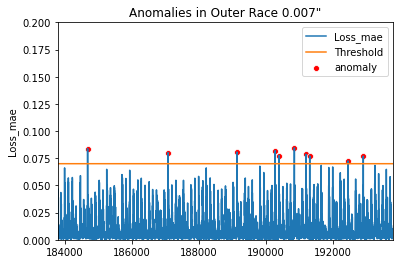

In [30]:
plt.plot(scored_train.index, scored_train.Loss_mae, label='Loss_mae')
plt.plot(scored_train.index, scored_train.Threshold, label='Threshold')
g = sns.scatterplot(x=anomalies.index , y=anomalies.Loss_mae, label='anomaly', color='red')
g.set(xlim = (len(scored_train.index)-10000, len(scored_train.index)), ylim = (0, 0.2))
plt.title('Anomalies in Outer Race 0.007"')
plt.legend();